In [1512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1513]:
data = pd.read_csv("online_shoppers_intention.csv")

In [1514]:
import imblearn

In [1515]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [1516]:
print("Number of records : ", len(data.index))
print("Number of Features : ", len(data.columns))

Number of records :  12330
Number of Features :  18


In [1517]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

--> 8 Categorical Columns - 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
    'Weekend', 'Revenue'
    
--> 10 Numerical columns - 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'

In [1518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

## Checking for missing values

In [1519]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [1520]:
# There are no missing values in the dataset.

## Summary Statistics

In [1521]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Discarding junk values

In [1522]:
m1 = (data.ProductRelated_Duration != 0.0) | (data.Administrative_Duration != 0.0) | (data.Informational_Duration != 0.0) 
data = data[m1]
len(data.index)

11610

In [1523]:
num_cols=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

Q1=data[num_cols].quantile(0.25)
Q3=data[num_cols].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
IQR


Administrative               0.000000
Administrative_Duration      0.000000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated               9.000000
ProductRelated_Duration    239.125000
BounceRates                  0.000000
ExitRates                    0.013396
PageValues                   0.000000
SpecialDay                   0.000000
Name: 0.25, dtype: float64
Administrative                4.000000
Administrative_Duration     100.050000
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               40.000000
ProductRelated_Duration    1553.172619
BounceRates                   0.013333
ExitRates                     0.042222
PageValues                    0.000000
SpecialDay                    0.000000
Name: 0.75, dtype: float64


Administrative                4.000000
Administrative_Duration     100.050000
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               31.000000
ProductRelated_Duration    1314.047619
BounceRates                   0.013333
ExitRates                     0.028827
PageValues                    0.000000
SpecialDay                    0.000000
dtype: float64

In [1524]:
num_cols=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

lower = Q1 - 1.5* IQR
upper = Q3 + 1.5* IQR
print("lower limit",'\n',lower,'\n')
print("upper limit",'\n',upper,'\n')

((data[num_cols]< (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR))).sum()

lower limit 
 Administrative               -6.000000
Administrative_Duration    -150.075000
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated              -37.500000
ProductRelated_Duration   -1731.946429
BounceRates                  -0.020000
ExitRates                    -0.029844
PageValues                    0.000000
SpecialDay                    0.000000
dtype: float64 

upper limit 
 Administrative               10.000000
Administrative_Duration     250.125000
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               86.500000
ProductRelated_Duration    3524.244048
BounceRates                   0.033333
ExitRates                     0.085462
PageValues                    0.000000
SpecialDay                    0.000000
dtype: float64 



Administrative              404
Administrative_Duration    1049
Informational              2625
Informational_Duration     2405
ProductRelated              945
ProductRelated_Duration     898
BounceRates                1218
ExitRates                   870
PageValues                 2730
SpecialDay                 1171
dtype: int64

## Data Visualization

# Chapter 2 – Exploratory Data Analysis 
 
The purpose of exploratory data analysis is two-fold:   To understand the data in terms of Visitor session information and visitor pageview information across various independent variables   Get insights on various features. 

In [1526]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

(array([1.0956e+04, 4.7300e+02, 1.1400e+02, 3.9000e+01, 1.2000e+01,
        3.0000e+00, 5.0000e+00, 6.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0.        ,  36.17637419,  72.35274838, 108.52912257,
        144.70549676, 180.88187095, 217.05824514, 253.23461933,
        289.41099352, 325.58736771, 361.7637419 ]),
 <a list of 10 Patch objects>)

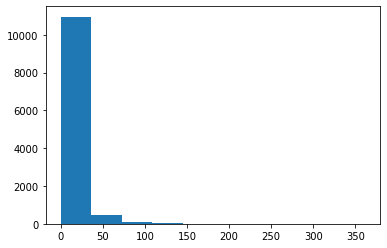

In [1527]:
plt.hist(data['PageValues'])

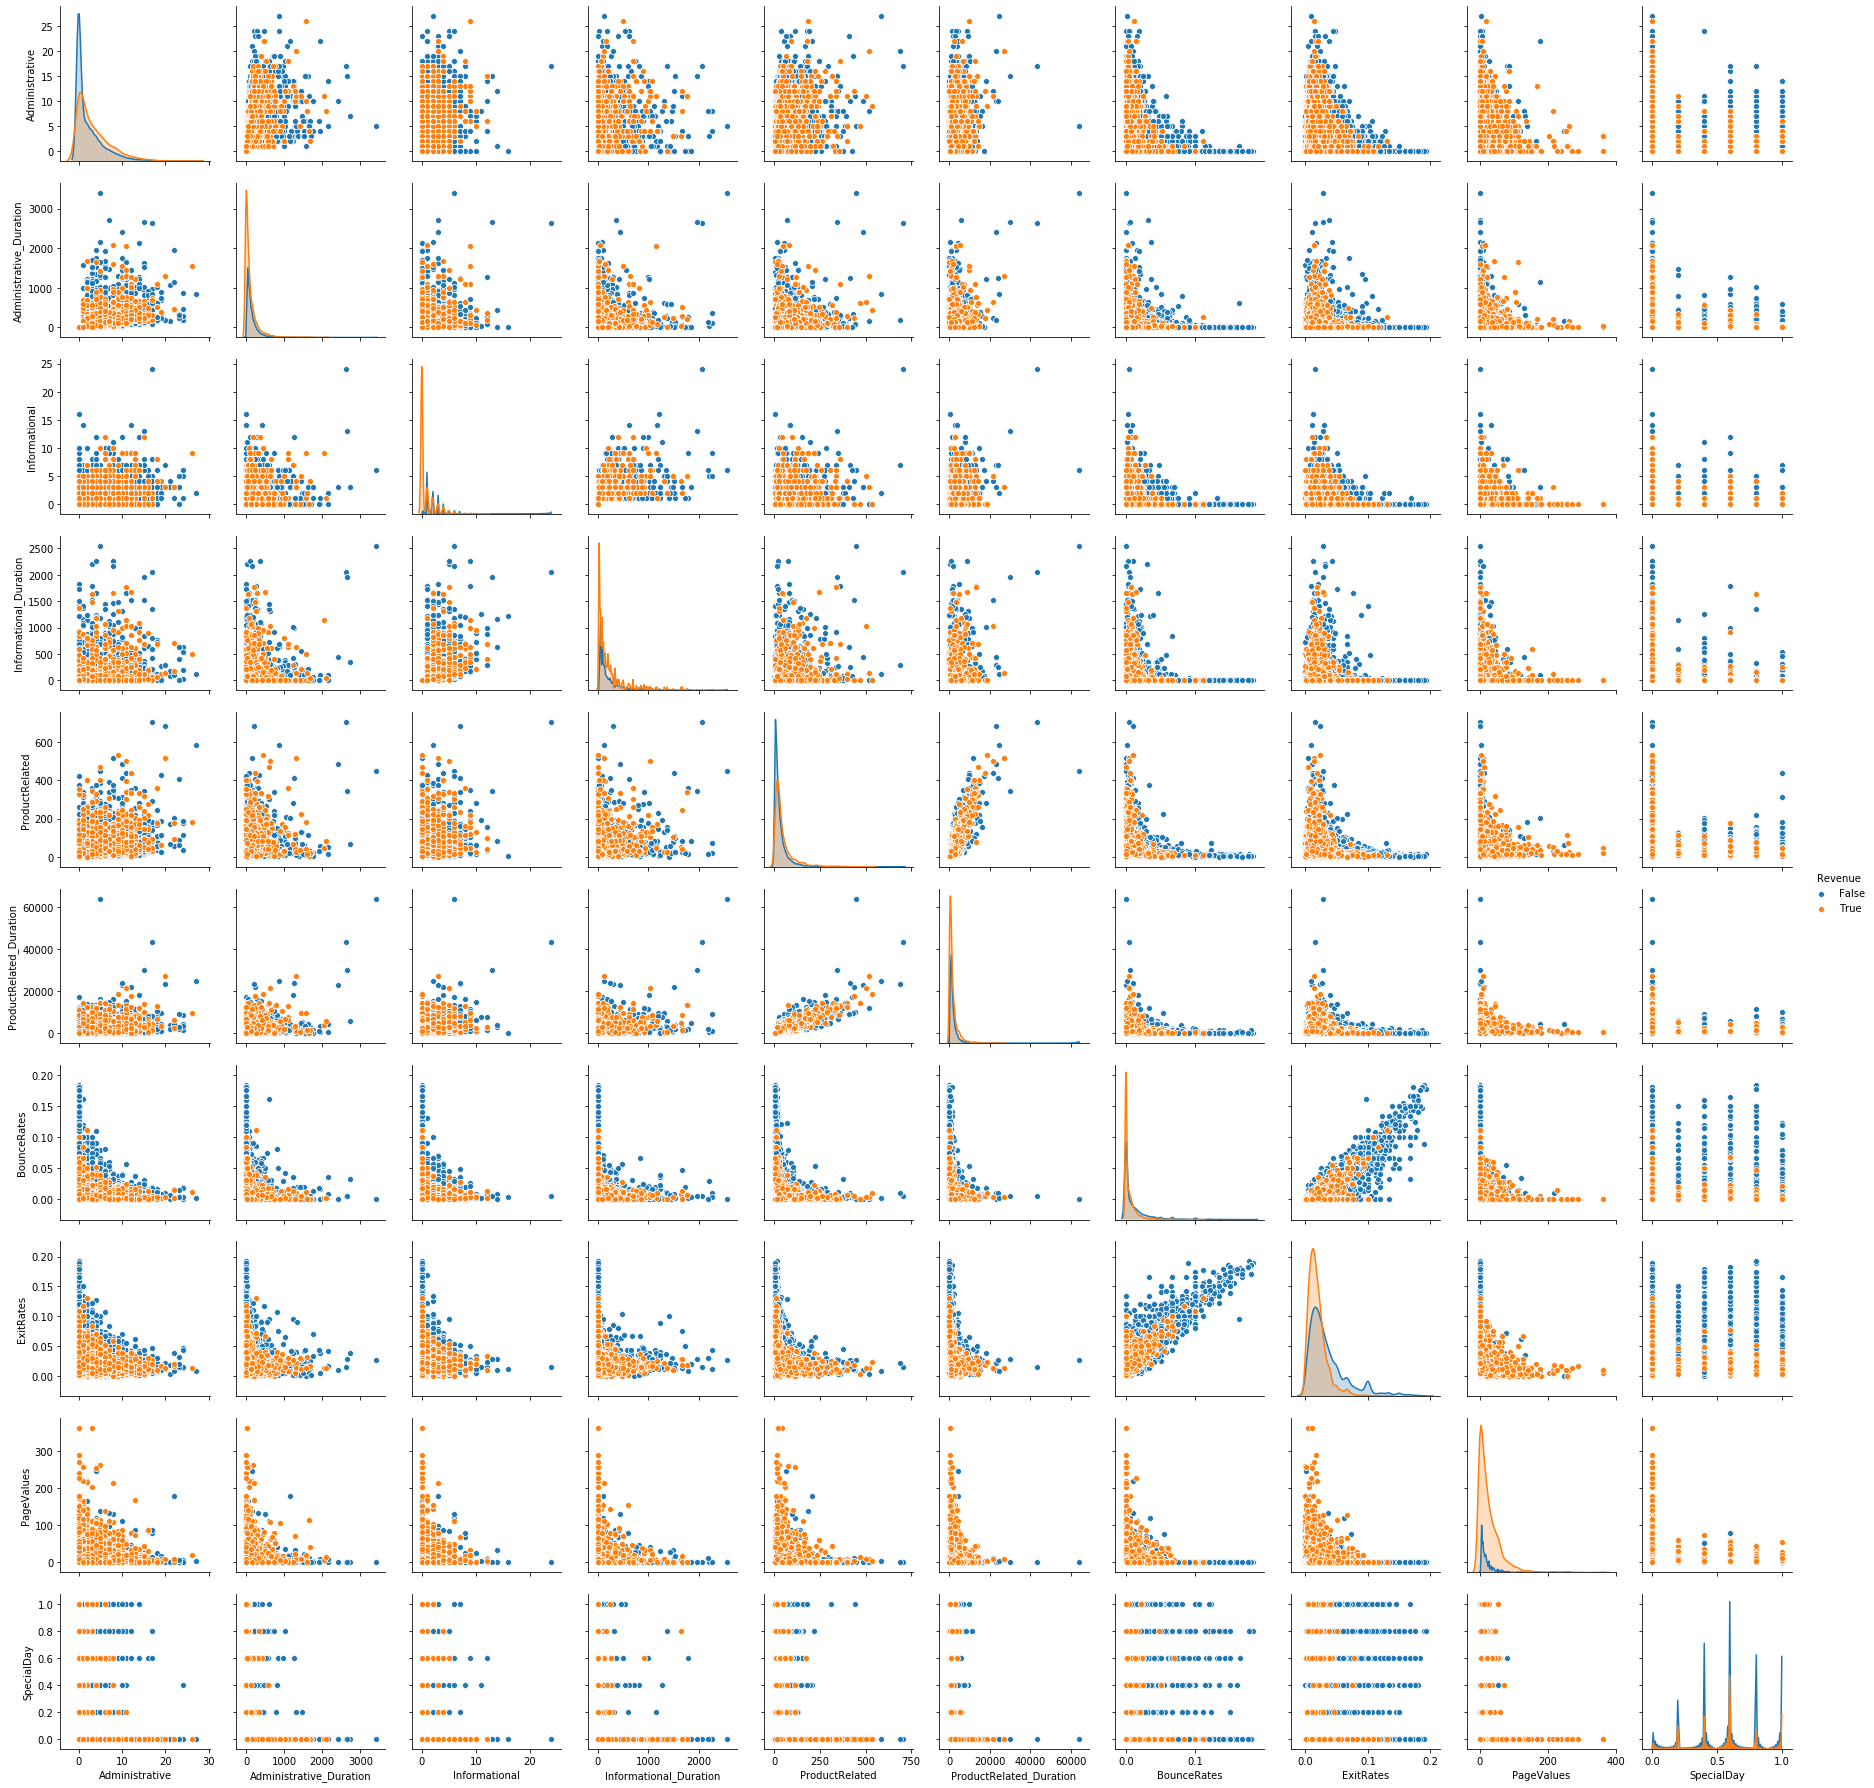

In [1528]:
sns.pairplot(data, vars = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],hue = 'Revenue')

Inferences - 

1) These is positive correlation between BounceRates and ExitRates. Customers with low BounceRates and low ExitRates made the purchase.

2) If the page value is less 100, users are more likely to make the purchase.

3) ExitRates and BounceRates are less from ProductRelated page as compared to Administrative and informational.

4) Special Day is not having much affect on customer's purchase intension.



### Visit to pages vs Revenue

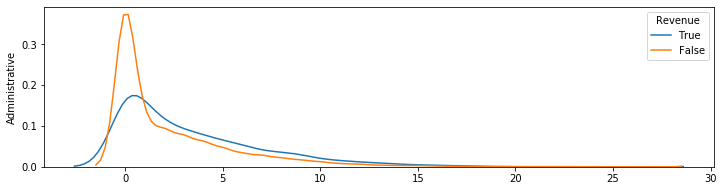

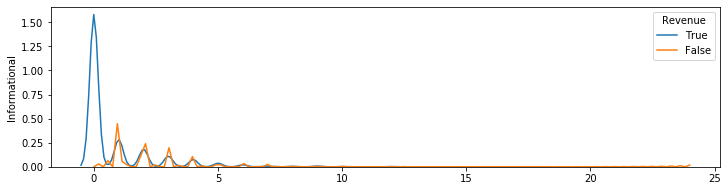

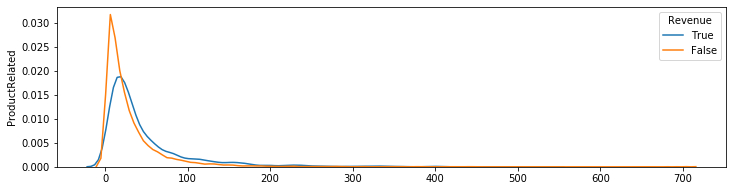

In [1529]:
plt.figure(figsize=(12,10))

ax1 = plt.subplot(311)
sns.kdeplot(data[data.Revenue == True].Administrative)
sns.kdeplot(data[data.Revenue == False].Administrative)
plt.ylabel('Administrative')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

plt.figure(figsize=(12,10))
ax2 = plt.subplot(312)
sns.kdeplot(data[data.Revenue == True].Informational)
sns.kdeplot(data[data.Revenue == False].Informational)
plt.ylabel('Informational')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()

plt.figure(figsize=(12,10))
ax3 = plt.subplot(313)
sns.kdeplot(data[data.Revenue == True].ProductRelated)
sns.kdeplot(data[data.Revenue == False].ProductRelated)
plt.ylabel('ProductRelated')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()


C:\Users\Ajay\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


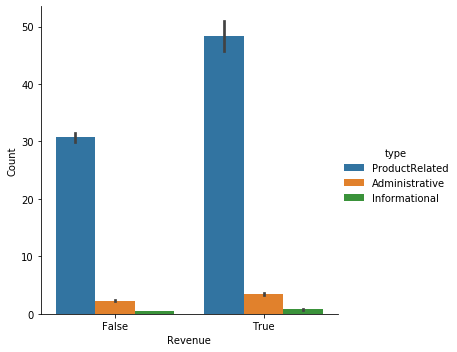

In [1530]:
df2 = pd.melt(data[['ProductRelated','Administrative','Informational','Revenue']], id_vars='Revenue', var_name="type", value_name="Count")
df2
sns.factorplot(x='Revenue', y='Count', hue='type', data=df2, kind='bar')

Inference -

Customers visited ProductRelated web page more as compared to Administrative and Informational.

### BounceRates and ExitRates vs Revenue

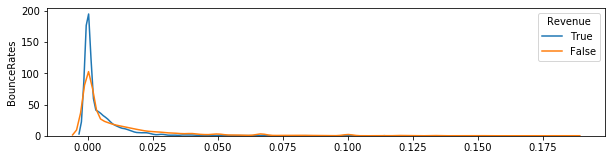

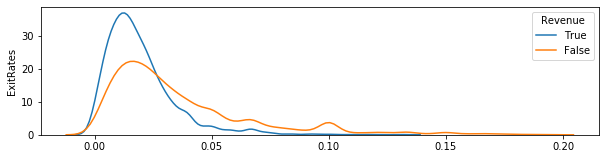

In [1531]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot(311)
sns.kdeplot(data[data.Revenue == True].BounceRates)
sns.kdeplot(data[data.Revenue == False].BounceRates)
plt.ylabel('BounceRates')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

plt.figure(figsize=(10,8))
ax2 = plt.subplot(312)
sns.kdeplot(data[data.Revenue == True].ExitRates)
sns.kdeplot(data[data.Revenue == False].ExitRates)
plt.ylabel('ExitRates')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()




Inference - 

Customers with low exit rate and low bounce rate generated more revenue.

### Special Day vs Revenue

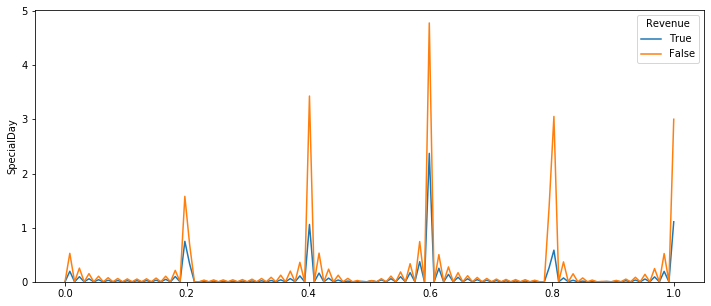

In [1532]:
plt.figure(figsize=(12,5))
sns.kdeplot(data[data.Revenue == True].SpecialDay)
sns.kdeplot(data[data.Revenue == False].SpecialDay)
plt.ylabel('SpecialDay')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

Inference -

Closeness to Special Day is not having much affect on revenue generation.

### Revenue vs VisitorType

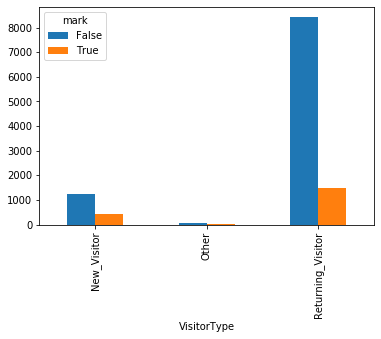

In [1533]:
ct = pd.crosstab(data.VisitorType,data.Revenue)
ct.plot.bar()
plt.legend(title='mark') 

Inference - 

1) Most of the customers visiting the website are Returning visistors, contributing to most number of purchases.

2) About 25 % of New_visitors made the purchase as compared to 14 % of Returning visitors.

### Weekend vs Revenue

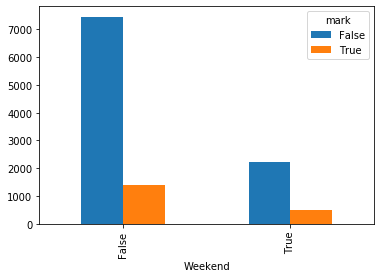

In [1534]:
ct1 = pd.crosstab(data.Weekend,data.Revenue)
ct1.plot.bar()
plt.legend(title='mark')

Inference - 

It is evident that even though the no of visitors in weekdays are more compared to weekends but there is no significant difference in conversion to Revenue rates.

### Month vs Revenue

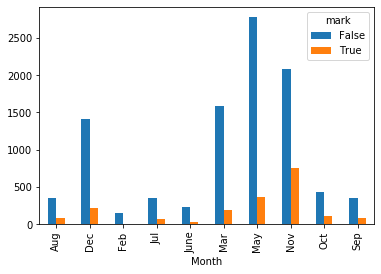

In [1535]:
ct2 = pd.crosstab(data.Month,data.Revenue)
ct2.plot.bar()
plt.legend(title='mark')

Inferences -  

1) Most of the customers visited the website in the month of May and November.

2) Highest number of purchases have been made in the month of November. 

3) Webste is least visited by customers in the month of Feb and also the purchase is negligible as compared to other months.

### Region vs Revenue

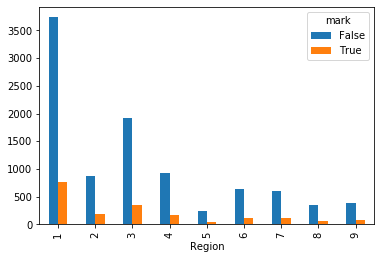

In [1536]:
ct4 = pd.crosstab(data.Region,data.Revenue)
ct4.plot.bar()
plt.legend(title='mark')

Inference -

1) Most revenue is generated from Region 1 followed by region 3.

2) Regions 5 and 8 have negligble contribution in revenue generation.

### TrafficType vs Revenue

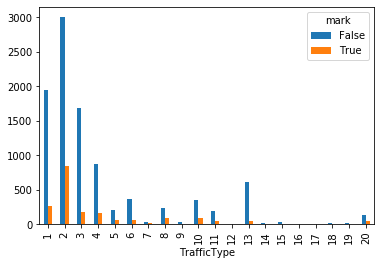

In [1537]:
ct5 = pd.crosstab(data.TrafficType,data.Revenue)
ct5.plot.bar()
plt.legend(title='mark')

Inference -

Most revenue is generated by traffic type 2, followed by 1 and 3.

### OperatingSystems vs Revenue

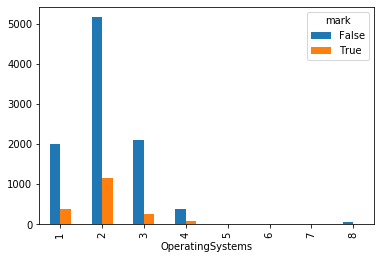

In [1538]:
ct6 = pd.crosstab(data.OperatingSystems,data.Revenue)
ct6.plot.bar()
plt.legend(title='mark')

Inference - 

Most revenue is generated from Operating System type 2.

### Browser vs Revenue

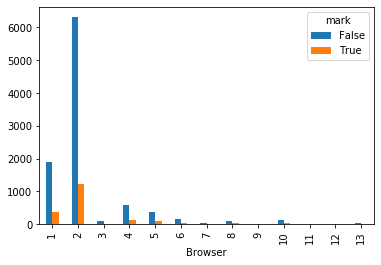

In [1539]:
ct7 = pd.crosstab(data.Browser,data.Revenue)
ct7.plot.bar()
plt.legend(title='mark')

Inference - 

Most revenue is generated from browser 2.No contribution from browsers 3,9,11,12,13.

## Changing Categorical columns to Numerical 

In [1540]:
categorical_features = ['Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']


In [1541]:
data=pd.get_dummies(data,prefix=['Visitortype'],columns=['VisitorType'],drop_first=True)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Visitortype_Other,Visitortype_Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,False,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,False,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,True,False,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,False,False,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,False,False,0,1


In [1542]:
Revenue_map={False:0,True:1}
data['Revenue']=data['Revenue'].map(Revenue_map)
Weekend_map={False:0,True:1}
data['Weekend']=data['Weekend'].map(Weekend_map)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Visitortype_Other,Visitortype_Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,0,0,0,1


In [1543]:
sr=data.groupby(['Month'])['Revenue'].sum()
sr=pd.DataFrame(sr)
sr=sr.rename(columns={'Revenue':'true'})
sr['false']=data.groupby(['Month'])['Revenue'].count()-(sr.true)
sr['SR']=sr.true/(sr.false+sr.true)
data['Month']=data['Month'].map(sr['SR'])

In [1544]:
sr=data.groupby(['OperatingSystems'])['Revenue'].sum()
sr=pd.DataFrame(sr)
sr=sr.rename(columns={'Revenue':'true'})
sr['false']=data.groupby(['OperatingSystems'])['Revenue'].count()-(sr.true)
sr['SR']=sr.true/(sr.false+sr.true)
data['OperatingSystems']=data['OperatingSystems'].map(sr['SR'])

In [1545]:
sr=data.groupby(['Browser'])['Revenue'].sum()
sr=pd.DataFrame(sr)
sr=sr.rename(columns={'Revenue':'true'})
sr['false']=data.groupby(['Browser'])['Revenue'].count()-(sr.true)
sr['SR']=sr.true/(sr.false+sr.true)
data['Browser']=data['Browser'].map(sr['SR'])

In [1546]:
sr=data.groupby(['Region'])['Revenue'].sum()
sr=pd.DataFrame(sr)
sr=sr.rename(columns={'Revenue':'true'})
sr['false']=data.groupby(['Region'])['Revenue'].count()-(sr.true)
sr['SR']=sr.true/(sr.false+sr.true)
data['Region']=data['Region'].map(sr['SR'])

In [1547]:
sr=data.groupby(['TrafficType'])['Revenue'].sum()
sr=pd.DataFrame(sr)
sr=sr.rename(columns={'Revenue':'true'})
sr['false']=data.groupby(['TrafficType'])['Revenue'].count()-(sr.true)
sr['SR']=sr.true/(sr.false+sr.true)
data['TrafficType']=data['TrafficType'].map(sr['SR'])

In [1548]:
data.shape

(11610, 19)

In [1549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11610 entries, 1 to 12329
Data columns (total 19 columns):
Administrative                   11610 non-null int64
Administrative_Duration          11610 non-null float64
Informational                    11610 non-null int64
Informational_Duration           11610 non-null float64
ProductRelated                   11610 non-null int64
ProductRelated_Duration          11610 non-null float64
BounceRates                      11610 non-null float64
ExitRates                        11610 non-null float64
PageValues                       11610 non-null float64
SpecialDay                       11610 non-null float64
Month                            11610 non-null float64
OperatingSystems                 11610 non-null float64
Browser                          11610 non-null float64
Region                           11610 non-null float64
TrafficType                      11610 non-null float64
Weekend                          11610 non-null int64
Rev

## Feature Selection

Feature selection is the process of selecting a subset of relevant attributes to be used in making the model in machine learning. Effective feature selection eliminates redundant variables and keeps only the best subset of predictors in the model which also gives shorter training times. Besides this, it avoids the curse of dimensionality and enhances generalization by reducing overfitting.  One of the alternatives of feature selection which can be performed for model building purpose is feature extraction technique such as feature extraction techniques like PCA (Principal Component Analysis). However, in this case, the features in the reduced space will be the linear combinations of 17 attributes, which brings the need of tracking all features during the visit and updating the feature vector after a new action is taken by the visitor. Therefore, it has been deemed appropriate to apply feature selection instead of feature extraction within the scope of this research. 
 
In this project, feature selection techniques are applied to improve the classification performance and/or scalability of the system. So we tried applying different feature selection techniques 

1. KBest features using Chi2  values One common feature selection method that is used with text data is the Chi-Square feature selection. The χ2χ2 test is used in statistics to test the independence of two events. More specifically in feature selection we use it to test whether the occurrence of a specific term and the occurrence of a specific class are independent. More formally, given a document DD, we estimate the following quantity for each term and rank them by their score: 
 
 
 
 
Where  NN is the observed frequency in and EE the expected frequency  Et takes the value 1 if the document contains term tt and 0 otherwise  Ec takes the value 1 if the document is in class cc and 0 otherwise 
 
 
For each feature (term), a corresponding high χ2χ2 score indicates that the null hypothesis H0H0 of independence (meaning the document class has no influence over the term's frequency) should be rejected and the occurrence of the term and class are dependent. 

### 1.Univariate - KBest features using chi2 values

In [1550]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=data.drop(columns=['Revenue'])
y=data['Revenue']

In [1551]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
bf = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(bf.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [1552]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(12,'Score'))

                            Specs          Score
5         ProductRelated_Duration  669033.458485
8                      PageValues  161497.955629
1         Administrative_Duration   30406.776785
3          Informational_Duration   27692.492338
4                  ProductRelated   14590.433485
0                  Administrative     821.112759
2                   Informational     273.286203
9                      SpecialDay      53.978159
17  Visitortype_Returning_Visitor      17.425452
7                       ExitRates      13.622361
10                          Month       9.431617
6                     BounceRates       8.750709


2. Variance Inflation Factor (VIF) Multicollinearity is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. Issues with multicollinearity are that the standard errors of the affected coefficients tend to be large, the data redundancy in the explanatory variables may result in model overfitting.

Predictive uncertainty caused by multicollinearity thus poses a challenge for predictive environmental niche or species distribution modelling, especially when used to predict the distribution of a species under novel conditions. 
 
 
One way to detect multicollinearity is the variance inflation factor analysis. The VIF is widely used as a measure of the degree of multi-collinearity of the ith independent variable with the other independent variables in a regression model. If we have explanatory variables X1, X2, X3, … Xi, the VIF for an explanatory variable X1 can be calculated by running an ordinary least square regression that has X1 as a function of all the other explanatory variables X2 … Xi. The VIF is than computed following Equation, 
 
 
 
where R2 is the coefficient of determination of the regression equation. This can be repeated for each of the explanatory variables. The size of VIF gives the magnitude of the multicollinearity. The square root of the VIF shows how much larger the standard error is, compared with what it would be if that variable were uncorrelated with the other predictor variables in the model. 

### 2.VIF

In [1553]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[2.052340788420532,
 2.131295669499028,
 1.7809143170954735,
 6.784421753813836,
 6.026141622601449,
 3.274104256495045,
 6.328313849160865,
 1.1737406949167581,
 1.213724410092072,
 8.224633689379,
 40.132367220897905,
 83.51202860806782,
 93.05240599169012,
 9.914044535080983,
 1.3309607093499605,
 1.20173862943226,
 7.946123189448815]

In [1554]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.",i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:",a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [1555]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)


Iteration no. 1
[2.8881022868042168, 2.052340788420532, 2.131295669499028, 1.7809143170954735, 6.784421753813836, 6.026141622601449, 3.274104256495045, 6.328313849160865, 1.1737406949167581, 1.213724410092072, 8.224633689379, 40.132367220897905, 83.51202860806782, 93.05240599169012, 9.914044535080983, 1.3309607093499605, 1.20173862943226, 7.946123189448815]
Max VIF is for variable no.: 13
Iteration no. 2
[2.8859917138955913, 2.050063442595179, 2.131277689342882, 1.7808505079100947, 6.784239386271759, 6.024933196802411, 3.2718827773251014, 6.294000580523634, 1.1737406949164697, 1.2078378085594226, 7.933723448368279, 36.48898994999595, 49.18991080812365, 9.489514825317091, 1.3232954880609975, 1.1339472339257757, 7.627734099631696]
Max VIF is for variable no.: 12
Iteration no. 3
[2.875563393470504, 2.0459093696907638, 2.130846924177871, 1.779368809222092, 6.78284583552828, 6.018106279275204, 3.2511591659953005, 6.26518590742738, 1.1733591570648785, 1.2020653902403866, 7.535778746611992, 1

In [1556]:
train_out.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'TrafficType', 'Weekend',
       'Visitortype_Other', 'Visitortype_Returning_Visitor'],
      dtype='object')

3. Wrapper method In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem.  
 
 
 

### 3.Backward Elimination

In [1557]:
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    x_1 = X[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_feature_BE = cols
print(selected_feature_BE)

C:\Users\Ajay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems', 'Browser', 'TrafficType', 'Visitortype_Other', 'Visitortype_Returning_Visitor']


4. Backward Elimination In backward elimination, we start with all the features and remove the least significant feature in each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features. 
 
4.1 Recursive Feature Elimination It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

### 4. Recursive Feature Elimination

In [1558]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model,10 )
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Num Features: 10
Selected Features: [False False False False False False  True  True False  True  True  True
  True  True  True False  True  True]
Feature Ranking: [6 7 2 8 5 9 1 1 4 1 1 1 1 1 1 3 1 1]


In [1559]:
from sklearn.model_selection import train_test_split
num_ls = np.arange(1,14)
num = 0
high_score = 0
score_list = []
for i in range(len(num_ls)):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    LR = LogisticRegression()
    rfe = RFE(LR,num_ls[i])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    LR.fit(x_train_rfe,y_train)
    score = LR.score(x_test_rfe,y_test)
    print(rfe.support_)
    print(rfe.ranking_)
    print(score)
    if(score>high_score):
        high_score = score
        num = num_ls[i]
print("The highest r score is {}".format(high_score))
print("{} number of features give the best score of {}".format(num,high_score))

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False False  True False False False False
 False False False False False False]
[14 17 11 16 15 18  4  1 13  6  2  5  7 10  3 12  8  9]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False False  True False False  True False
 False False False False False False]
[13 16 10 15 14 17  3  1 12  5  1  4  6  9  2 11  7  8]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False False  True False False  True False
 False False  True False False False]
[12 15  9 14 13 16  2  1 11  4  1  3  5  8  1 10  6  7]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False False  True False
 False False  True False False False]
[11 14  8 13 12 15  1  1 10  3  1  2  4  7  1  9  5  6]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False False  True  True
 False False  True False False False]
[10 13  7 12 11 14  1  1  9  2  1  1  3  6  1  8  4  5]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False  True  True  True
 False False  True False False False]
[ 9 12  6 11 10 13  1  1  8  1  1  1  2  5  1  7  3  4]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False  True  True  True
  True False  True False False False]
[ 8 11  5 10  9 12  1  1  7  1  1  1  1  4  1  6  2  3]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False  True  True  True
  True False  True False  True False]
[ 7 10  4  9  8 11  1  1  6  1  1  1  1  3  1  5  1  2]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False  True  True  True
  True False  True False  True  True]
[ 6  9  3  8  7 10  1  1  5  1  1  1  1  2  1  4  1  1]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False False False False False  True  True False  True  True  True
  True  True  True False  True  True]
[5 8 2 7 6 9 1 1 4 1 1 1 1 1 1 3 1 1]
0.8377835199540626


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False  True False False False  True  True False  True  True  True
  True  True  True False  True  True]
[4 7 1 6 5 8 1 1 3 1 1 1 1 1 1 2 1 1]
0.837496411139822


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False  True False False False  True  True False  True  True  True
  True  True  True  True  True  True]
[3 6 1 5 4 7 1 1 2 1 1 1 1 1 1 1 1 1]
0.837496411139822


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[False False  True False False False  True  True  True  True  True  True
  True  True  True  True  True  True]
[2 5 1 4 3 6 1 1 1 1 1 1 1 1 1 1 1 1]
0.8762561010623026
The highest r score is 0.8762561010623026
13 number of features give the best score of 0.8762561010623026


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1560]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Visitortype_Other', 'Visitortype_Returning_Visitor'],
      dtype='object')


## Base Models without Feature Engineering

In [1561]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,accuracy_score,recall_score,roc_auc_score,roc_curve,precision_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [1562]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

In [1563]:
from scipy.stats import zscore
d1 = data.drop('Revenue',axis=1)
df_scaled = d1.apply(zscore)
df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitortype_Other,Visitortype_Returning_Visitor
1,-0.728811,-0.474238,-0.410192,-0.252882,-0.699966,-0.618484,-0.528798,2.218910,-0.327889,-0.307955,-2.203439,0.660849,-0.118947,0.603256,0.917864,-0.555661,-0.076756,0.418877
3,-0.728811,-0.474238,-0.410192,-0.252882,-0.699966,-0.649968,1.782939,3.551606,-0.327889,-0.307955,-2.203439,-1.812311,-0.118947,1.089281,-0.071538,-0.555661,-0.076756,0.418877
4,-0.728811,-0.474238,-0.410192,-0.252882,-0.522836,-0.329220,0.395897,0.553039,-0.327889,-0.307955,-2.203439,-1.812311,-6.055275,0.603256,-0.071538,1.799659,-0.076756,0.418877
5,-0.728811,-0.474238,-0.410192,-0.252882,-0.323564,-0.572172,0.201224,-0.294510,-0.327889,-0.307955,-2.203439,0.660849,-0.118947,0.603256,-1.111089,-0.555661,-0.076756,0.418877
8,-0.728811,-0.474238,-0.410192,-0.252882,-0.699966,-0.632344,-0.528798,2.218910,-0.327889,3.710431,-2.203439,0.660849,-0.118947,1.089281,-1.111089,-0.555661,-0.076756,0.418877


In [1564]:
Model_KNN = []
Accuracy_KNN = []
F1Score_KNN = []
Sen_KNN = []
Spe_KNN = []
FPR_KNN = []
FNR_KNN = []

Model_LR = []
Accuracy_LR = []
F1Score_LR = []
Sen_LR = []
Spe_LR = []
FPR_LR = []
FNR_LR = []

Model_DT = []
Accuracy_DT = []
F1Score_DT = []
Sen_DT = []
Spe_DT = []
FPR_DT = []
FNR_DT = []

Model_NB = []
Accuracy_NB = []
F1Score_NB = []
Sen_NB = []
Spe_NB = []
FPR_NB = []
FNR_NB = []

Model_XG = []
Accuracy_XG = []
F1Score_XG = []
Sen_XG = []
Spe_XG = []
FPR_XG = []
FNR_XG = []

In [1565]:
def calculateScore_LR(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_LR.append(TP / (TP + FN))
    Spe_LR.append(TN / (FP + TN))
    FPR_LR.append(FP / (FP + TN))
    FNR_LR.append(FN / (FN + TP))
    
    
def calculateScore_NB(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_NB.append(TP / (TP + FN))
    Spe_NB.append(TN / (FP + TN))
    FPR_NB.append(FP / (FP + TN))
    FNR_NB.append(FN / (FN + TP))
    
def calculateScore_DT(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_DT.append(TP / (TP + FN))
    Spe_DT.append(TN / (FP + TN))
    FPR_DT.append(FP / (FP + TN))
    FNR_DT.append(FN / (FN + TP))    
    
def calculateScore_KNN(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_KNN.append(TP / (TP + FN))
    Spe_KNN.append(TN / (FP + TN))
    FPR_KNN.append(FP / (FP + TN))
    FNR_KNN.append(FN / (FN + TP))    
    
def calculateScore_XG(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_XG.append(TP / (TP + FN))
    Spe_XG.append(TN / (FP + TN))
    FPR_XG.append(FP / (FP + TN))
    FNR_XG.append(FN / (FN + TP))    
    

In [1566]:
x = df_scaled
y = data.Revenue
data.Revenue.value_counts()

0    9705
1    1905
Name: Revenue, dtype: int64

In [1567]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 0)
(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

((9288, 18), (2322, 18), (9288,), (2322,))

#  Algorithms used for building models 
    Logistic Regression 
    KNN 
    Naïve Bayes 
    Decision Tress 
    XGBoost

### Logistic Regression

In [1568]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1569]:
y_pred = lr.predict(xtest)
y_pred1 = lr.predict(xtrain)

In [1570]:
print(accuracy_score(ytest,y_pred))
print(accuracy_score(ytrain,y_pred1))
print(recall_score(ytest,y_pred,average='weighted'))
print(precision_score(ytest,y_pred,average='weighted'))
print(f1_score(ytest,y_pred,average='weighted'))

0.8828596037898363
0.8787683031869078
0.8828596037898363
0.8705090022539548
0.87063948195068


In [1571]:
cm = confusion_matrix(ytest,y_pred)
calculateScore_LR(cm)
Model_LR.append('Logistic Regression')
Accuracy_LR.append(accuracy_score(ytest,y_pred))
F1Score_LR.append(f1_score(ytest,y_pred))

In [1572]:
Model.append('Logistic Regression')
Accuracy.append(accuracy_score(ytest,y_pred))
F1Score.append(f1_score(ytest,y_pred))

In [1573]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [1574]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.4245810055865922 0.9663951120162932


In [1575]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1964
           1       0.70      0.42      0.53       358

    accuracy                           0.88      2322
   macro avg       0.80      0.70      0.73      2322
weighted avg       0.87      0.88      0.87      2322



### Decision Tree

In [1576]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1577]:
y_pred = dt.predict(xtest)
y_pred1 = dt.predict(xtrain)

In [1578]:
print(accuracy_score(ytest,y_pred))
print(accuracy_score(ytrain,y_pred1))
print(recall_score(ytest,y_pred,average='weighted'))
print(precision_score(ytest,y_pred,average='weighted'))
print(f1_score(ytest,y_pred,average='weighted'))

0.8466838931955211
1.0
0.8466838931955211
0.8513000298775388
0.8488592327019489


In [1579]:
cm = confusion_matrix(ytest,y_pred)
calculateScore_DT(cm)
Model.append('Decission Tree')
Accuracy.append(accuracy_score(ytest,y_pred))
F1Score.append(f1_score(ytest,y_pred))
Model_DT.append('Decission Tree')
Accuracy_DT.append(accuracy_score(ytest,y_pred))
F1Score_DT.append(f1_score(ytest,y_pred))

In [1580]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.5391061452513967 0.9027494908350305


In [1581]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1964
           1       0.50      0.54      0.52       358

    accuracy                           0.85      2322
   macro avg       0.71      0.72      0.71      2322
weighted avg       0.85      0.85      0.85      2322



### KNN

In [1582]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1583]:
y_pred = knn.predict(xtest)
y_pred1 = knn.predict(xtrain)

In [1584]:
print(accuracy_score(ytest,y_pred))
print(accuracy_score(ytrain,y_pred1))
print(recall_score(ytest,y_pred,average='weighted'))
print(precision_score(ytest,y_pred,average='weighted'))
print(f1_score(ytest,y_pred,average='weighted'))

0.8807062876830318
0.8965331610680448
0.8807062876830318
0.8681421688914591
0.86949478993219


In [1585]:
cm = confusion_matrix(ytest,y_pred)
calculateScore_KNN(cm)
Model.append('KNN')
Accuracy.append(accuracy_score(ytest,y_pred))
F1Score.append(f1_score(ytest,y_pred))
Model_KNN.append('KNN')
Accuracy_KNN.append(accuracy_score(ytest,y_pred))
F1Score_KNN.append(f1_score(ytest,y_pred))

In [1586]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.4329608938547486 0.9623217922606925


In [1587]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1964
           1       0.68      0.43      0.53       358

    accuracy                           0.88      2322
   macro avg       0.79      0.70      0.73      2322
weighted avg       0.87      0.88      0.87      2322



### Naive Bayes

In [1588]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1589]:
y_pred = nb.predict(xtest)
y_pred1 = nb.predict(xtrain)

In [1590]:
print(accuracy_score(ytest,y_pred))
print(accuracy_score(ytrain,y_pred1))
print(recall_score(ytest,y_pred,average='weighted'))
print(precision_score(ytest,y_pred,average='weighted'))
print(f1_score(ytest,y_pred,average='weighted'))

0.8402239448751077
0.8245047372954349
0.8402239448751077
0.8614345425070848
0.8486233435645765


In [1591]:
cm = confusion_matrix(ytest,y_pred)
calculateScore_NB(cm)
Model.append('Navie Bayes')
Accuracy.append(accuracy_score(ytest,y_pred))
F1Score.append(f1_score(ytest,y_pred))
Model_NB.append('Navie Bayes')
Accuracy_NB.append(accuracy_score(ytest,y_pred))
F1Score_NB.append(f1_score(ytest,y_pred))

In [1592]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.6368715083798883 0.8772912423625254


In [1593]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1964
           1       0.49      0.64      0.55       358

    accuracy                           0.84      2322
   macro avg       0.71      0.76      0.73      2322
weighted avg       0.86      0.84      0.85      2322



In [1594]:
result_ = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score})
result_

,Model,Accuracy,F1Score
0,Logistic Regression,0.882860,0.527778
1,Decission Tree,0.846684,0.520216
2,KNN,0.880706,0.528109
3,Navie Bayes,0.840224,0.551391


# Models After Feature Selection Techniques

## A.Univariate - KBest features using chi2 values

In [1595]:
columns = ['ProductRelated_Duration','PageValues','Administrative_Duration','Informational_Duration','ProductRelated',
          'Administrative','Informational','SpecialDay','Visitortype_Returning_Visitor','ExitRates']

In [1596]:
x = df_scaled[columns]
y = data.Revenue

In [1597]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 0)
(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

((9288, 10), (2322, 10), (9288,), (2322,))

# Imbalance Treatment: 

As observed during the EDA process, the revenue column also the target variable is highly imbalanced. 
Before proceeding with the model building, SMOTE was employed to overcome this issue. 
SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. 
The entire above mentioned can be summarized in the following table:

In [1598]:
## Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(xtrain, ytrain.ravel())
X_train_new=pd.DataFrame(X_train_new)
X_train_new.columns=columns
y_train_new=pd.DataFrame(y_train_new)
y_train_new.columns=['Revenue']


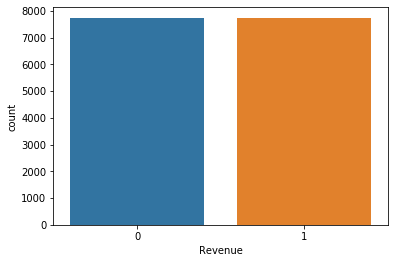

In [1599]:
sns.countplot(x="Revenue", data=y_train_new)

In [1600]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

### Logistic Regression

In [1601]:
lr = LogisticRegression()

In [1602]:
lr.fit(X_train_new, y_train_new)
train_pred_sm = lr.predict(X_train_new)
test_pred_sm = lr.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1603]:
Model.append('Logistic Regression_KB')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))

Model_LR.append('Logistic Regression_KB')
Accuracy_LR.append(accuracy_score(ytest,test_pred_sm))
F1Score_LR.append(f1_score(ytest,test_pred_sm))

In [1604]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8742463393626184
0.8141067045601343
0.7318435754189944
0.5720524017467249
0.642156862745098


In [1605]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_LR(cm)
print(cm)

[[1768  196]
 [  96  262]]


In [1606]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [1607]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7318435754189944 0.90020366598778


In [1608]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1964
           1       0.57      0.73      0.64       358

    accuracy                           0.87      2322
   macro avg       0.76      0.82      0.78      2322
weighted avg       0.89      0.87      0.88      2322



### Decision Tree

In [1609]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train_new)
train_pred_sm = dt.predict(X_train_new)
test_pred_sm = dt.predict(xtest)

In [1610]:
Model.append('Decissiom Tree_KB')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_DT.append('Decissiom Tree_KB')
Accuracy_DT.append(accuracy_score(ytest,test_pred_sm))
F1Score_DT.append(f1_score(ytest,test_pred_sm))

In [1611]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8393626184323859
0.9999354088619041
0.659217877094972
0.48459958932238195
0.5585798816568047


In [1612]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_DT(cm)
print(cm)

[[1713  251]
 [ 122  236]]


In [1613]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.659217877094972 0.8721995926680245


In [1614]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1964
           1       0.48      0.66      0.56       358

    accuracy                           0.84      2322
   macro avg       0.71      0.77      0.73      2322
weighted avg       0.86      0.84      0.85      2322



### KNN

In [1615]:
knn = KNeighborsClassifier()


In [1616]:
knn.fit(X_train_new, y_train_new)
train_pred_sm = knn.predict(X_train_new)
test_pred_sm = knn.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [1617]:
Model.append('KNN_KB')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_KNN.append('KNN_KB')
Accuracy_KNN.append(accuracy_score(ytest,test_pred_sm))
F1Score_KNN.append(f1_score(ytest,test_pred_sm))

In [1618]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.7932816537467701
0.9165482495801576
0.729050279329609
0.4052795031055901
0.5209580838323354


In [1619]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_KNN(cm)
print(cm)

[[1581  383]
 [  97  261]]


In [1620]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.729050279329609 0.804989816700611


In [1621]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1964
           1       0.41      0.73      0.52       358

    accuracy                           0.79      2322
   macro avg       0.67      0.77      0.69      2322
weighted avg       0.86      0.79      0.81      2322



### Naive Bayes

In [1622]:
nb = GaussianNB()

In [1623]:
nb.fit(X_train_new, y_train_new)
train_pred_sm = nb.predict(X_train_new)
test_pred_sm = nb.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1624]:
Model.append('Navie Bayes_KB')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_NB.append('Navie Bayes_KB')
Accuracy_NB.append(accuracy_score(ytest,test_pred_sm))
F1Score_NB.append(f1_score(ytest,test_pred_sm))

In [1625]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.772609819121447
0.7308487275545795
0.7486033519553073
0.37960339943342775
0.5037593984962406


In [1626]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_NB(cm)
print(cm)

[[1526  438]
 [  90  268]]


In [1627]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7486033519553073 0.7769857433808554


In [1628]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1964
           1       0.38      0.75      0.50       358

    accuracy                           0.77      2322
   macro avg       0.66      0.76      0.68      2322
weighted avg       0.86      0.77      0.80      2322



# XGBOOST 

In [1629]:
import xgboost

In [1630]:

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
model = xgboost.XGBClassifier()



In [1631]:
model.fit(X_train_new, y_train_new)
train_pred_sm = model.predict(X_train_new)
test_pred_sm = model.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1632]:
Model.append('XGBoost_KB')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_XG.append('XGBoost_KB')
Accuracy_XG.append(accuracy_score(ytest,test_pred_sm))
F1Score_XG.append(f1_score(ytest,test_pred_sm))

In [1633]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8725236864771748
0.8876114197132153
0.7849162011173184
0.562
0.655011655011655


In [1634]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_XG(cm)
print(cm)

[[1745  219]
 [  77  281]]


In [1635]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7849162011173184 0.8884928716904277


In [1636]:
print((f1_score(ytest,test_pred_sm)))


0.655011655011655


In [1637]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1964
           1       0.56      0.78      0.66       358

    accuracy                           0.87      2322
   macro avg       0.76      0.84      0.79      2322
weighted avg       0.90      0.87      0.88      2322



In [1638]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
result

,Model,Accuracy,F1Score,Sensitivity,Specificity,FPR,FNR
0,Logistic Regression_KB,0.874246,0.642157,0.948498,0.572052,0.427948,0.051502
1,Decissiom Tree_KB,0.839363,0.558580,0.933515,0.484600,0.515400,0.066485
2,KNN_KB,0.793282,0.520958,0.942193,0.405280,0.594720,0.057807
3,Navie Bayes_KB,0.772610,0.503759,0.944307,0.379603,0.620397,0.055693
4,XGBoost_KB,0.872524,0.655012,0.957739,0.562000,0.438000,0.042261


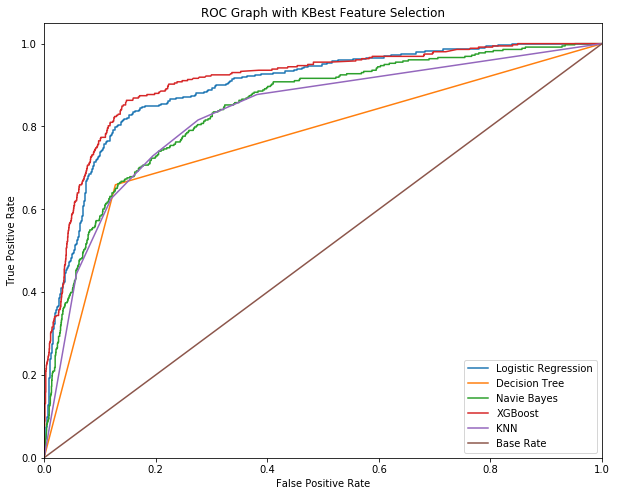

In [1639]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, lr.predict_proba(xtest)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(ytest, dt.predict_proba(xtest)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nb.predict_proba(xtest)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn.predict_proba(xtest)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(nb_fpr, nb_tpr, label='Navie Bayes')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with KBest Feature Selection')
plt.legend(loc="lower right")
plt.show()

## B. VIF

In [1640]:
columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'TrafficType', 'Weekend',
       'Visitortype_Other', 'Visitortype_Returning_Visitor']

In [1641]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

In [1642]:
x = df_scaled[columns]
y = data.Revenue

In [1643]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 0)
(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

((8127, 12), (3483, 12), (8127,), (3483,))

In [1644]:
## Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(xtrain, ytrain.ravel())
X_train_new=pd.DataFrame(X_train_new)
X_train_new.columns=columns
y_train_new=pd.DataFrame(y_train_new)
y_train_new.columns=['Revenue']



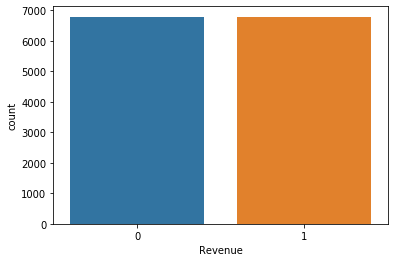

In [1645]:
sns.countplot(x="Revenue", data=y_train_new)

### Logistic Regression

In [1646]:
lr = LogisticRegression()

In [1647]:
lr.fit(X_train_new, y_train_new)
train_pred_sm = lr.predict(X_train_new)
test_pred_sm = lr.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1648]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8751076658053403
0.8176661264181524
0.727433628318584
0.5939306358381503
0.6539379474940334


In [1649]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_LR(cm)
print(cm)
Model.append('Logistic Regression_VIF')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_LR.append('Logistic Regression_VIF')
Accuracy_LR.append(accuracy_score(ytest,test_pred_sm))
F1Score_LR.append(f1_score(ytest,test_pred_sm))

[[2637  281]
 [ 154  411]]


In [1650]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [1651]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.727433628318584 0.9037011651816312


In [1652]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2918
           1       0.59      0.73      0.65       565

    accuracy                           0.88      3483
   macro avg       0.77      0.82      0.79      3483
weighted avg       0.89      0.88      0.88      3483



### Decision Tree

In [1653]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train_new)
train_pred_sm = dt.predict(X_train_new)
test_pred_sm = dt.predict(xtest)

In [1654]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8317542348550101
1.0
0.6424778761061947
0.4859437751004016
0.5533536585365854


In [1655]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_DT(cm)
print(cm)
Model.append('Decission Tree_VIF')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_DT.append('Decissiom Tree_VIF')
Accuracy_DT.append(accuracy_score(ytest,test_pred_sm))
F1Score_DT.append(f1_score(ytest,test_pred_sm))

[[2534  384]
 [ 202  363]]


In [1656]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.6424778761061947 0.8684030157642221


In [1657]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2918
           1       0.49      0.64      0.55       565

    accuracy                           0.83      3483
   macro avg       0.71      0.76      0.72      3483
weighted avg       0.85      0.83      0.84      3483



### KNN

In [1658]:
knn = KNeighborsClassifier()


In [1659]:
knn.fit(X_train_new, y_train_new)
train_pred_sm = knn.predict(X_train_new)
test_pred_sm = knn.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [1660]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8067757680160781
0.9161632532783263
0.7168141592920354
0.4411764705882353
0.5461901550910316


In [1661]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_KNN(cm)
print(cm)
Model.append('KNN_VIF')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_KNN.append('KNN_VIF')
Accuracy_KNN.append(accuracy_score(ytest,test_pred_sm))
F1Score_KNN.append(f1_score(ytest,test_pred_sm))

[[2405  513]
 [ 160  405]]


In [1662]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7168141592920354 0.8241946538725154


In [1663]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2918
           1       0.44      0.72      0.55       565

    accuracy                           0.81      3483
   macro avg       0.69      0.77      0.71      3483
weighted avg       0.86      0.81      0.82      3483



### Naive Bayes

In [1664]:
nb = GaussianNB()

In [1665]:
nb.fit(X_train_new, y_train_new)
train_pred_sm = nb.predict(X_train_new)
test_pred_sm = nb.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1666]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.7505024404249211
0.7339030499484308
0.7079646017699115
0.36231884057971014
0.4793289394847214


In [1667]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_NB(cm)
print(cm)
Model.append('Navie Bayes_VIF')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_NB.append('Navie Bayes_VIF')
Accuracy_NB.append(accuracy_score(ytest,test_pred_sm))
F1Score_NB.append(f1_score(ytest,test_pred_sm))

[[2214  704]
 [ 165  400]]


In [1668]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7079646017699115 0.7587388622344071


In [1669]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2918
           1       0.36      0.71      0.48       565

    accuracy                           0.75      3483
   macro avg       0.65      0.73      0.66      3483
weighted avg       0.84      0.75      0.78      3483



# XGBOOST

In [1670]:

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
model = xgboost.XGBClassifier()



In [1671]:
model.fit(X_train_new, y_train_new)
train_pred_sm = model.predict(X_train_new)
test_pred_sm = model.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1672]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8808498420901522
0.8982613820539266
0.8
0.5994694960212201
0.6853677028051555


In [1673]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_XG(cm)
print(cm)
Model.append('XGBoost_VIF')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_XG.append('XGBoost_VIF')
Accuracy_XG.append(accuracy_score(ytest,test_pred_sm))
F1Score_XG.append(f1_score(ytest,test_pred_sm))

[[2616  302]
 [ 113  452]]


In [1674]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.8 0.8965044551062371


In [1675]:
print((f1_score(ytest,test_pred_sm)))


0.6853677028051555


In [1676]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2918
           1       0.60      0.80      0.69       565

    accuracy                           0.88      3483
   macro avg       0.78      0.85      0.81      3483
weighted avg       0.90      0.88      0.89      3483



In [1677]:
result1 = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
result1

,Model,Accuracy,F1Score,Sensitivity,Specificity,FPR,FNR
0,Logistic Regression_VIF,0.875108,0.653938,0.944823,0.593931,0.406069,0.055177
1,Decission Tree_VIF,0.831754,0.553354,0.926170,0.485944,0.514056,0.073830
2,KNN_VIF,0.806776,0.546190,0.937622,0.441176,0.558824,0.062378
3,Navie Bayes_VIF,0.750502,0.479329,0.930643,0.362319,0.637681,0.069357
4,XGBoost_VIF,0.880850,0.685368,0.958593,0.599469,0.400531,0.041407


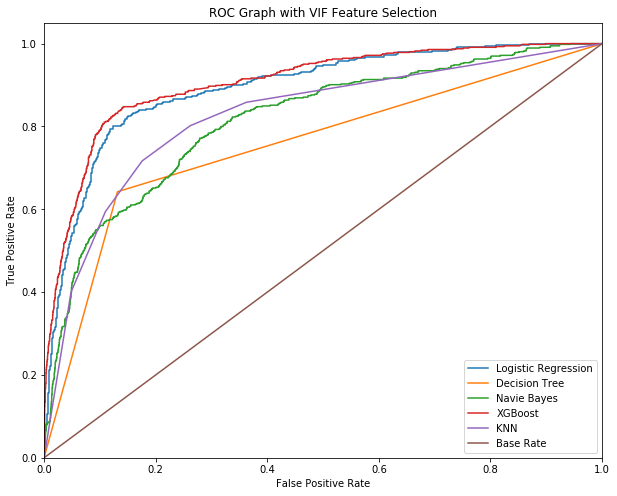

In [1678]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, lr.predict_proba(xtest)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(ytest, dt.predict_proba(xtest)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nb.predict_proba(xtest)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn.predict_proba(xtest)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(nb_fpr, nb_tpr, label='Navie Bayes')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with VIF Feature Selection')
plt.legend(loc="lower right")
plt.show()

## C.Backward Elimination

In [1679]:
columns = ['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems', 'Browser', 'TrafficType', 'Visitortype_Other', 'Visitortype_Returning_Visitor']

In [1680]:
x = df_scaled[columns]
y = data.Revenue

In [1681]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 0)
(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

((9288, 10), (2322, 10), (9288,), (2322,))

In [1682]:
## Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(xtrain, ytrain.ravel())
X_train_new=pd.DataFrame(X_train_new)
X_train_new.columns=columns
y_train_new=pd.DataFrame(y_train_new)
y_train_new.columns=['Revenue']


In [1683]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

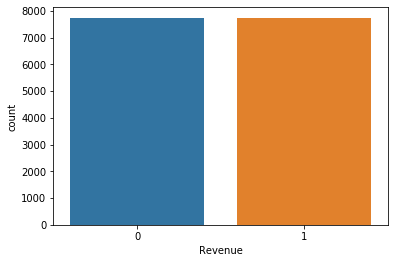

In [1684]:
sns.countplot(x="Revenue", data=y_train_new)

### Logistic Regression

In [1685]:
lr = LogisticRegression()

In [1686]:
lr.fit(X_train_new, y_train_new)
train_pred_sm = lr.predict(X_train_new)
test_pred_sm = lr.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1687]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8505598621877691
0.815979847564914
0.776536312849162
0.5100917431192661
0.6157253599114065


In [1688]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_LR(cm)
print(cm)
Model.append('Logistic Regression_BE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_LR.append('Logistic Regression_BE')
Accuracy_LR.append(accuracy_score(ytest,test_pred_sm))
F1Score_LR.append(f1_score(ytest,test_pred_sm))

[[1697  267]
 [  80  278]]


In [1689]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [1690]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.776536312849162 0.8640529531568228


In [1691]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91      1964
           1       0.51      0.78      0.62       358

    accuracy                           0.85      2322
   macro avg       0.73      0.82      0.76      2322
weighted avg       0.89      0.85      0.86      2322



### Decision Tree

In [1692]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train_new)
train_pred_sm = dt.predict(X_train_new)
test_pred_sm = dt.predict(xtest)

In [1693]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8402239448751077
1.0
0.6312849162011173
0.4860215053763441
0.5492102065613609


In [1694]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_DT(cm)
print(cm)
Model.append('Decission Tree_BE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_DT.append('Decissiom Tree_BE')
Accuracy_DT.append(accuracy_score(ytest,test_pred_sm))
F1Score_DT.append(f1_score(ytest,test_pred_sm))

[[1725  239]
 [ 132  226]]


In [1695]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.6312849162011173 0.8783095723014257


In [1696]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1964
           1       0.49      0.63      0.55       358

    accuracy                           0.84      2322
   macro avg       0.71      0.75      0.73      2322
weighted avg       0.86      0.84      0.85      2322



### KNN

In [1697]:
knn = KNeighborsClassifier()


In [1698]:
knn.fit(X_train_new, y_train_new)
train_pred_sm = knn.predict(X_train_new)
test_pred_sm = knn.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [1699]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8225667527993109
0.92429918615166
0.7486033519553073
0.4542372881355932
0.5654008438818565


In [1700]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_KNN(cm)
print(cm)
Model.append('KNN_BE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_KNN.append('KNN_BE')
Accuracy_KNN.append(accuracy_score(ytest,test_pred_sm))
F1Score_KNN.append(f1_score(ytest,test_pred_sm))

[[1642  322]
 [  90  268]]


In [1701]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7486033519553073 0.8360488798370672


In [1702]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1964
           1       0.45      0.75      0.57       358

    accuracy                           0.82      2322
   macro avg       0.70      0.79      0.73      2322
weighted avg       0.87      0.82      0.84      2322



### Naive Bayes

In [1703]:
nb = GaussianNB()

In [1704]:
nb.fit(X_train_new, y_train_new)
train_pred_sm = nb.predict(X_train_new)
test_pred_sm = nb.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1705]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8285960378983634
0.7418938121689704
0.659217877094972
0.4609375
0.5425287356321838


In [1706]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_NB(cm)
print(cm)
Model.append('Navie Bayes_BE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_NB.append('Navie Bayes_BE')
Accuracy_NB.append(accuracy_score(ytest,test_pred_sm))
F1Score_NB.append(f1_score(ytest,test_pred_sm))

[[1688  276]
 [ 122  236]]


In [1707]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.659217877094972 0.8594704684317719


In [1708]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1964
           1       0.46      0.66      0.54       358

    accuracy                           0.83      2322
   macro avg       0.70      0.76      0.72      2322
weighted avg       0.86      0.83      0.84      2322



# XGBOOST

In [1709]:

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
model = xgboost.XGBClassifier()



In [1710]:
model.fit(X_train_new, y_train_new)
train_pred_sm = model.predict(X_train_new)
test_pred_sm = model.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1711]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8785529715762274
0.8985919131895104
0.7737430167597765
0.5794979079497908
0.6626794258373206


In [1712]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_XG(cm)
print(cm)
Model.append('XGBoost_BE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_XG.append('XGBoost_BE')
Accuracy_XG.append(accuracy_score(ytest,test_pred_sm))
F1Score_XG.append(f1_score(ytest,test_pred_sm))

[[1763  201]
 [  81  277]]


In [1713]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7737430167597765 0.8976578411405295


In [1714]:
print((f1_score(ytest,test_pred_sm)))


0.6626794258373206


In [1715]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1964
           1       0.58      0.77      0.66       358

    accuracy                           0.88      2322
   macro avg       0.77      0.84      0.79      2322
weighted avg       0.90      0.88      0.89      2322



In [1716]:
result2 = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
result2

,Model,Accuracy,F1Score,Sensitivity,Specificity,FPR,FNR
0,Logistic Regression_BE,0.850560,0.615725,0.954980,0.510092,0.489908,0.045020
1,Decission Tree_BE,0.840224,0.549210,0.928918,0.486022,0.513978,0.071082
2,KNN_BE,0.822567,0.565401,0.948037,0.454237,0.545763,0.051963
3,Navie Bayes_BE,0.828596,0.542529,0.932597,0.460938,0.539062,0.067403
4,XGBoost_BE,0.878553,0.662679,0.956074,0.579498,0.420502,0.043926


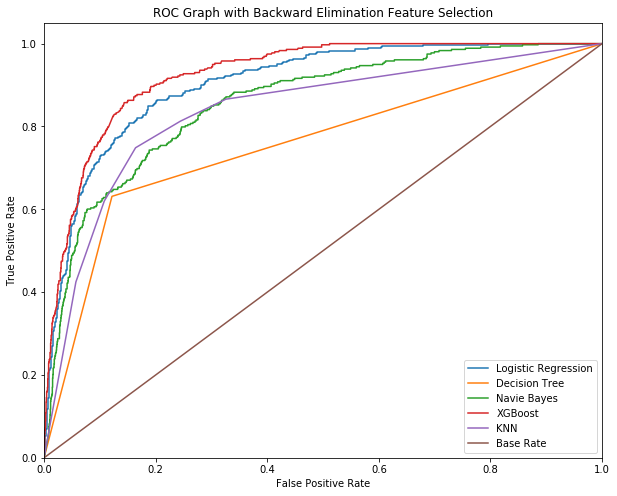

In [1717]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, lr.predict_proba(xtest)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(ytest, dt.predict_proba(xtest)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nb.predict_proba(xtest)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn.predict_proba(xtest)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(nb_fpr, nb_tpr, label='Navie Bayes')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with Backward Elimination Feature Selection')
plt.legend(loc="lower right")
plt.show()

## D.Recursive Feature Elimination

In [1718]:
columns = ['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Visitortype_Other', 'Visitortype_Returning_Visitor']

In [1719]:
x = df_scaled[columns]
y = data.Revenue

In [1720]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 0)
(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

((9288, 12), (2322, 12), (9288,), (2322,))

In [1721]:
## Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(xtrain, ytrain.ravel())
X_train_new=pd.DataFrame(X_train_new)
X_train_new.columns=columns
y_train_new=pd.DataFrame(y_train_new)
y_train_new.columns=['Revenue']


In [1722]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

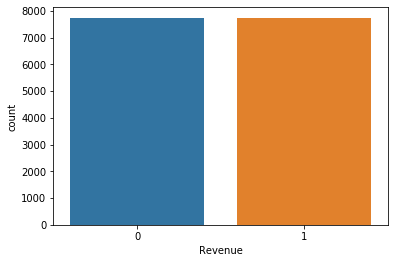

In [1723]:
sns.countplot(x="Revenue", data=y_train_new)

### Logistic Regression

In [1724]:
lr = LogisticRegression()

In [1725]:
lr.fit(X_train_new, y_train_new)
train_pred_sm = lr.predict(X_train_new)
test_pred_sm = lr.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1726]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8402239448751077
0.8212763208887741
0.7821229050279329
0.4886561954624782
0.6015037593984962


In [1727]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_LR(cm)
print(cm)
Model.append('Logistic Regression_RFE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_LR.append('Logistic Regression_RFE')
Accuracy_LR.append(accuracy_score(ytest,test_pred_sm))
F1Score_LR.append(f1_score(ytest,test_pred_sm))

[[1671  293]
 [  78  280]]


In [1728]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [1729]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7821229050279329 0.8508146639511202


In [1730]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1964
           1       0.49      0.78      0.60       358

    accuracy                           0.84      2322
   macro avg       0.72      0.82      0.75      2322
weighted avg       0.88      0.84      0.85      2322



### Decision Tree

In [1731]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train_new)
train_pred_sm = dt.predict(X_train_new)
test_pred_sm = dt.predict(xtest)

In [1732]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8475452196382429
0.9999354088619041
0.6005586592178771
0.5046948356807511
0.548469387755102


In [1733]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_DT(cm)
print(cm)
Model.append('Decission Tree_RFE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_DT.append('Decissiom Tree_RFE')
Accuracy_DT.append(accuracy_score(ytest,test_pred_sm))
F1Score_DT.append(f1_score(ytest,test_pred_sm))

[[1753  211]
 [ 143  215]]


In [1734]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.6005586592178771 0.8925661914460286


In [1735]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1964
           1       0.50      0.60      0.55       358

    accuracy                           0.85      2322
   macro avg       0.71      0.75      0.73      2322
weighted avg       0.86      0.85      0.85      2322



### KNN

In [1736]:
knn = KNeighborsClassifier()


In [1737]:
knn.fit(X_train_new, y_train_new)
train_pred_sm = knn.predict(X_train_new)
test_pred_sm = knn.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [1738]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8023255813953488
0.9281100632993153
0.7150837988826816
0.4176182707993475
0.5272914521112255


In [1739]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_KNN(cm)
print(cm)
Model.append('KNN_RFE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_KNN.append('KNN_RFE')
Accuracy_KNN.append(accuracy_score(ytest,test_pred_sm))
F1Score_KNN.append(f1_score(ytest,test_pred_sm))

[[1607  357]
 [ 102  256]]


In [1740]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7150837988826816 0.8182281059063137


In [1741]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1964
           1       0.42      0.72      0.53       358

    accuracy                           0.80      2322
   macro avg       0.68      0.77      0.70      2322
weighted avg       0.86      0.80      0.82      2322



### Naive Bayes

In [1742]:
nb = GaussianNB()

In [1743]:
nb.fit(X_train_new, y_train_new)
train_pred_sm = nb.predict(X_train_new)
test_pred_sm = nb.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1744]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))


0.7424633936261843
0.7564914093786332
0.7793296089385475
0.34962406015037595
0.4826989619377162


In [1745]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_NB(cm)
print(cm)
Model.append('Navie Bayes_RFE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_NB.append('Navie Bayes_RFE')
Accuracy_NB.append(accuracy_score(ytest,test_pred_sm))
F1Score_NB.append(f1_score(ytest,test_pred_sm))

[[1445  519]
 [  79  279]]


In [1746]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.7793296089385475 0.7357433808553971


In [1747]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1964
           1       0.35      0.78      0.48       358

    accuracy                           0.74      2322
   macro avg       0.65      0.76      0.66      2322
weighted avg       0.86      0.74      0.78      2322



# XGBOOST

In [1748]:

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
model = xgboost.XGBClassifier()



In [1749]:
model.fit(X_train_new, y_train_new)
train_pred_sm = model.predict(X_train_new)
test_pred_sm = model.predict(xtest)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1750]:
print(accuracy_score(ytest,test_pred_sm))
print(accuracy_score(y_train_new,train_pred_sm))
print(recall_score(ytest,test_pred_sm))
print(precision_score(ytest,test_pred_sm))
print(f1_score(ytest,test_pred_sm))

0.8768303186907838
0.9094432243896138
0.776536312849162
0.5743801652892562
0.6603325415676959


In [1751]:
cm = confusion_matrix(ytest,test_pred_sm)
calculateScore(cm)
calculateScore_XG(cm)
print(cm)
Model.append('XGBoost_RFE')
Accuracy.append(accuracy_score(ytest,test_pred_sm))
F1Score.append(f1_score(ytest,test_pred_sm))
Model_XG.append('XGBoost_RFE')
Accuracy_XG.append(accuracy_score(ytest,test_pred_sm))
F1Score_XG.append(f1_score(ytest,test_pred_sm))

[[1758  206]
 [  80  278]]


In [1752]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity,specificity)

0.776536312849162 0.895112016293279


In [1753]:
print((f1_score(ytest,test_pred_sm)))


0.6603325415676959


In [1754]:
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.90      0.92      1964
           1       0.57      0.78      0.66       358

    accuracy                           0.88      2322
   macro avg       0.77      0.84      0.79      2322
weighted avg       0.90      0.88      0.88      2322



In [1755]:
result3 = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
result3

,Model,Accuracy,F1Score,Sensitivity,Specificity,FPR,FNR
0,Logistic Regression_RFE,0.840224,0.601504,0.955403,0.488656,0.511344,0.044597
1,Decission Tree_RFE,0.847545,0.548469,0.924578,0.504695,0.495305,0.075422
2,KNN_RFE,0.802326,0.527291,0.940316,0.417618,0.582382,0.059684
3,Navie Bayes_RFE,0.742463,0.482699,0.948163,0.349624,0.650376,0.051837
4,XGBoost_RFE,0.876830,0.660333,0.956474,0.574380,0.425620,0.043526


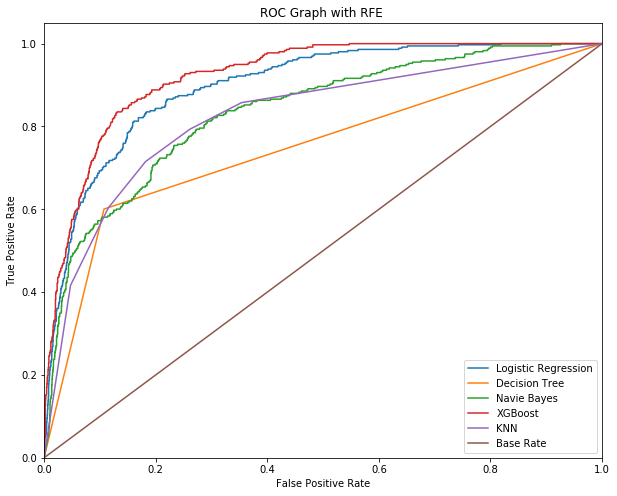

In [1756]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, lr.predict_proba(xtest)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(ytest, dt.predict_proba(xtest)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nb.predict_proba(xtest)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn.predict_proba(xtest)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(nb_fpr, nb_tpr, label='Navie Bayes')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with RFE ')
plt.legend(loc="lower right")
plt.show()

In [1757]:
result_fin=pd.concat([result,result1,result2,result3],axis=0)

In [1758]:
result_fin

,Model,Accuracy,F1Score,Sensitivity,Specificity,FPR,FNR
0,Logistic Regression_KB,0.874246,0.642157,0.948498,0.572052,0.427948,0.051502
1,Decissiom Tree_KB,0.839363,0.558580,0.933515,0.484600,0.515400,0.066485
2,KNN_KB,0.793282,0.520958,0.942193,0.405280,0.594720,0.057807
3,Navie Bayes_KB,0.772610,0.503759,0.944307,0.379603,0.620397,0.055693
4,XGBoost_KB,0.872524,0.655012,0.957739,0.562000,0.438000,0.042261
0,Logistic Regression_VIF,0.875108,0.653938,0.944823,0.593931,0.406069,0.055177
1,Decission Tree_VIF,0.831754,0.553354,0.926170,0.485944,0.514056,0.073830
2,KNN_VIF,0.806776,0.546190,0.937622,0.441176,0.558824,0.062378
3,Navie Bayes_VIF,0.750502,0.479329,0.930643,0.362319,0.637681,0.069357
4,XGBoost_VIF,0.880850,0.685368,0.958593,0.599469,0.400531,0.041407


# XGBOOST with VIF feature selection is giving the best results

# Logistic Regression

In [1766]:
result_LR = pd.DataFrame({'Model':Model_LR,'Accuracy':Accuracy_LR,'F1Score':F1Score_LR,'Sensitivity':Sen_LR,'Specificity':Spe_LR})
result_LR

,Model,Accuracy,F1Score,Sensitivity,Specificity
0,Logistic Regression,0.882860,0.527778,0.902091,0.697248
1,Logistic Regression_KB,0.874246,0.642157,0.948498,0.572052
2,Logistic Regression_VIF,0.875108,0.653938,0.944823,0.593931
3,Logistic Regression_BE,0.850560,0.615725,0.954980,0.510092
4,Logistic Regression_RFE,0.840224,0.601504,0.955403,0.488656


# KNN

In [1767]:
result_KNN = pd.DataFrame({'Model':Model_KNN,'Accuracy':Accuracy_KNN,'F1Score':F1Score_KNN,'Sensitivity':Sen_KNN,'Specificity':Spe_KNN})
result_KNN


,Model,Accuracy,F1Score,Sensitivity,Specificity
0,KNN,0.880706,0.528109,0.903010,0.676856
1,KNN_KB,0.793282,0.520958,0.942193,0.405280
2,KNN_VIF,0.806776,0.546190,0.937622,0.441176
3,KNN_BE,0.822567,0.565401,0.948037,0.454237
4,KNN_RFE,0.802326,0.527291,0.940316,0.417618


# Navie Bayes

In [1768]:
result_NB = pd.DataFrame({'Model':Model_NB,'Accuracy':Accuracy_NB,'F1Score':F1Score_NB,'Sensitivity':Sen_NB,'Specificity':Spe_NB})

In [1769]:
Accuracy

[0.8402239448751077,
 0.8475452196382429,
 0.8023255813953488,
 0.7424633936261843,
 0.8768303186907838]

# Decission Tree

In [1770]:
result_DT = pd.DataFrame({'Model':Model_DT,'Accuracy':Accuracy_DT,'F1Score':F1Score_DT,'Sensitivity':Sen_DT,'Specificity':Spe_DT})
result_DT


,Model,Accuracy,F1Score,Sensitivity,Specificity
0,Decission Tree,0.846684,0.520216,0.914861,0.502604
1,Decissiom Tree_KB,0.839363,0.558580,0.933515,0.484600
2,Decissiom Tree_VIF,0.831754,0.553354,0.926170,0.485944
3,Decissiom Tree_BE,0.840224,0.549210,0.928918,0.486022
4,Decissiom Tree_RFE,0.847545,0.548469,0.924578,0.504695


# XGBoost

In [1771]:
result_XG = pd.DataFrame({'Model':Model_XG,'Accuracy':Accuracy_XG,'F1Score':F1Score_XG,'Sensitivity':Sen_XG,'Specificity':Spe_XG})
result_XG


,Model,Accuracy,F1Score,Sensitivity,Specificity
0,XGBoost_KB,0.872524,0.655012,0.957739,0.562000
1,XGBoost_VIF,0.880850,0.685368,0.958593,0.599469
2,XGBoost_BE,0.878553,0.662679,0.956074,0.579498
3,XGBoost_RFE,0.876830,0.660333,0.956474,0.574380


#  We can see from the above table that the highest accuracy score and F1- score was achieved in XGBoost model which had the features selected from the VIF process

In this project, we aim to construct a real-time user behaviour analysis system for online shopping environment. We use an online retailer data to perform the experiments. In order to predict the purchasing intention of the visitor, we use aggregated page view data kept track during the visit along with some session and user information as input to machine learning algorithms. Oversampling and feature selection pre-processing techniques are applied to improve the success rates and scalability of the algorithms. The best results are achieved with  XGBoost algorithm. Our findings support the argument that the features extracted from clickstream data during the visit convey important information for online purchasing intention prediction. The findings show that choosing a minimal subset of combination of clickstream data aggregated statistics and session information such as the date and geographic region results in a more accurate and scalable system. Considering the real time usage of the proposed system, achieving better or similar classification performance with minimal subset of features is an important factor for the e-commerce companies since less number of features will be kept track during the session.